In [1]:
import pandas as pd
import numpy as np 
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
pd.options.display.max_rows=None
pd.options.display.max_columns=None
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv(r"C:\Users\Vinayak\minor_proj\collabRV\Raw Sets\DATASET FOR LSTM MODEL.csv",index_col=[1])

In [3]:
df.head(10)

,Unnamed: 0,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,re.admission.time..days.from.admission.,return.to.emergency.department.within.6.months,time.to.emergency.department.within.6.months,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,1,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22000,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Columns: 166 entries, Unnamed: 0 to ageCat
dtypes: float64(119), int64(32), object(15)
memory usage: 2.6+ MB


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['re.admission.time..days.from.admission.'],axis=1,inplace=True)
df.drop(['time.to.emergency.department.within.6.months'],axis=1,inplace=True)
df.head()

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,return.to.emergency.department.within.6.months,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,0,0,0,0,0,0,NaN,0.0,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,NaN,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN,7.44,-3.0,22.7,

In [6]:
df.drop(['DestinationDischarge', 'admission.ward','admission.way','occupation','discharge.department'], axis = 1,inplace=True)
df.drop(['weight','height'],axis=1,inplace=True)
df.head()
df.drop('cholinesterase',axis=1,inplace=True)
df.drop(['time.of.death..days.from.admission.'],axis=1,inplace=True)
df.drop(df[df['outcome.during.hospitalization'] == 0].index, inplace = True)
df.drop(["death.within.6.months","death.within.28.days","death.within.3.months"],axis=1,inplace=True)
df.drop(["visit.times"],axis=1,inplace=True)
df.drop(["dischargeDay"],axis=1,inplace=True)
df.drop(["re.admission.within.28.days","re.admission.within.3.months","re.admission.within.6.months"],axis=1,inplace=True)
df.drop(["return.to.emergency.department.within.6.months"],axis=1,inplace=True)
df.drop(["outcome.during.hospitalization"],axis=1,inplace=True)


In [7]:
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,Male,36.7,87,19,102,64,76.666667,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,"(69,79]"
743087,Female,36.8,95,18,150,70,96.666667,19.195303,Both,III,I,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,40.0,1.16,1.52,NaN,3.34,47.0,62.0,4.29,170.0,85.43,1.25,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,NaN,26.5,2.28,3.62,105.6,144.0,NaN

In [8]:
df.shape

(2008, 144)

In [9]:
cat_col=df.select_dtypes(include="object")

In [10]:
num_col=df.select_dtypes(include="number")

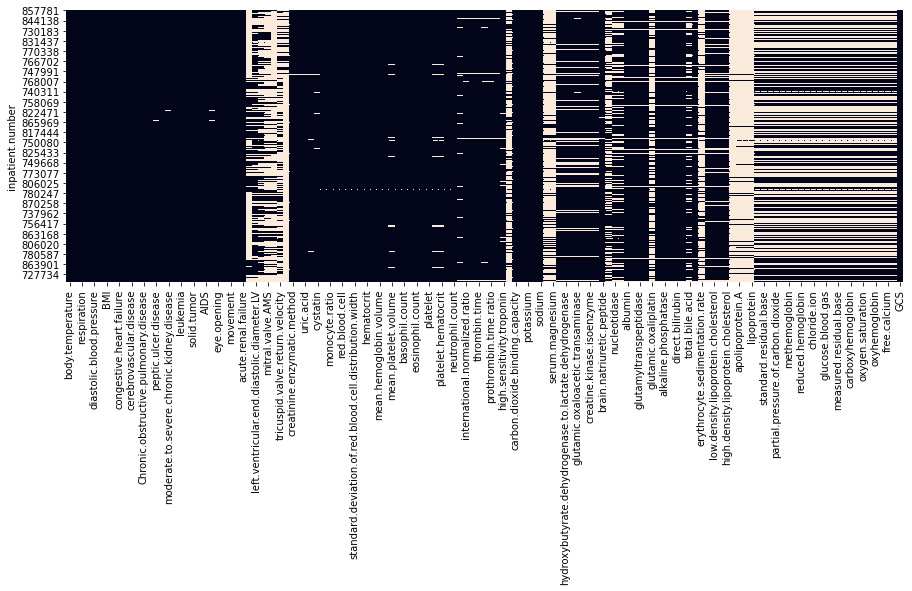

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(num_col.isnull(), cbar = False)

# display the plot
plt.show()


In [12]:
null_count=df.isnull().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
null_df=pd.concat([null_count,percentage],axis=1,keys=["null_count","percentage"])
null_df


,null_count,percentage
homocysteine,1862,92.729084
lipoprotein,1832,91.235060
apolipoprotein.B,1832,91.235060
apolipoprotein.A,1832,91.235060
tricuspid.valve.return.pressure,1826,90.936255
erythrocyte.sedimentation.rate,1701,84.711155
EA,1615,80.428287
myoglobin,1610,80.179283
serum.magnesium,1601,79.731076
Inorganic.Phosphorus,1601,79.731076


In [13]:
li = []
for column in df:
    ct = df[column].isna().sum()
    if(ct>1300):
        li.append(column)
li_new = {}

for i in li:
    ct = df[i].isna().sum()
    li_new.setdefault(i,ct)


In [14]:
df.drop(li,axis=1,inplace=True)
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,tricuspid.valve.return.velocity,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,Male,36.7,87,19,102,64,76.666667,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,21.6,2.28,5.59,101.9,134.6,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,83.0,65.0,11.4,61.0,23.8,6.9,18.3,4.9,61.9,3.46,1.90,2.69,0.84,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,"(69,79]"
743087,Female,36.8,95,18,150,70,96.666667,19.195303,Both,III,I,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,40.0,1.16,3.34,62.0,4.29,170.0,85.43,1.25,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,26.5,2.28,3.62,105.6,144.0,0.16,0.84,170.0,21.0,107.0,17.2,203.0,361.70,NaN,2.2,21.9,40.7,1.6,17.0,19.0,13.1,69.0,25.4,5.2,18.3,2.4,66.1,3.15,1.26,0.84,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,"(69,79]"
866418,Male,36.5,98,18,102,67,78.666667,24.221453,Both,II,II,0,0,0,0,0,

In [15]:
df.shape

(2008, 131)

In [16]:
num_col=df.select_dtypes(include="number")

In [17]:
cat_col=df.select_dtypes(include="object")

In [18]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Columns: 122 entries, body.temperature to GCS
dtypes: float64(99), int64(23)
memory usage: 1.9 MB


In [19]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   gender                                2008 non-null   object
 1   type.of.heart.failure                 2008 non-null   object
 2   NYHA.cardiac.function.classification  2008 non-null   object
 3   Killip.grade                          2008 non-null   object
 4   type.II.respiratory.failure           2008 non-null   object
 5   consciousness                         2008 non-null   object
 6   respiratory.support.                  2008 non-null   object
 7   oxygen.inhalation                     2008 non-null   object
 8   ageCat                                2008 non-null   object
dtypes: object(9)
memory usage: 221.4+ KB


In [20]:
df.shape

(2008, 131)

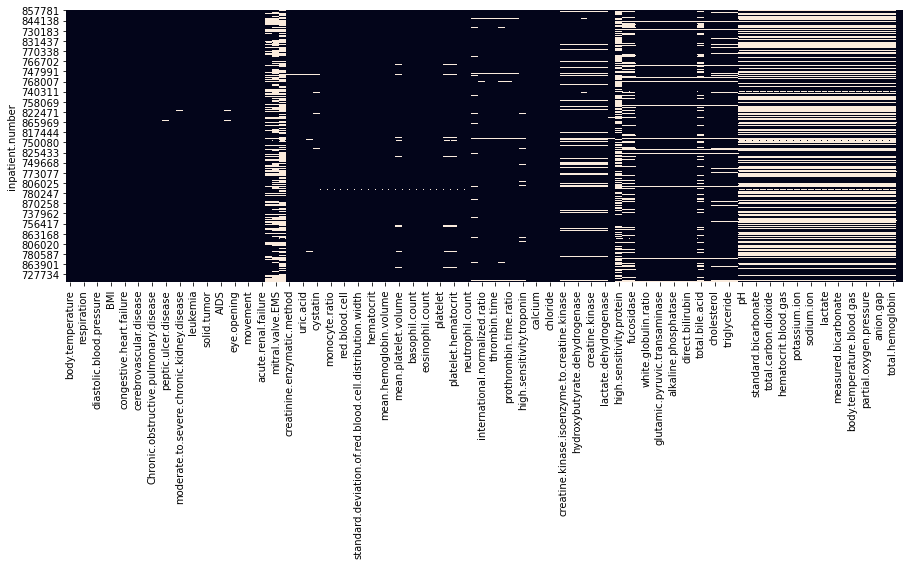

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(num_col.isnull(), cbar = False)

# display the plot
plt.show()


In [22]:
df['CCI.score']=df['CCI.score'].dropna()
df['peptic.ulcer.disease']=df['peptic.ulcer.disease'].dropna()
df['moderate.to.severe.chronic.kidney.disease']=df['moderate.to.severe.chronic.kidney.disease'].dropna()
df['liver.disease']=df['liver.disease'].dropna()

In [23]:
df.dropna(subset=['CCI.score', 'peptic.ulcer.disease','moderate.to.severe.chronic.kidney.disease','liver.disease'],inplace=True)

In [24]:
df.shape

(2003, 131)

In [25]:
num_col1=df.select_dtypes(include="number")

In [26]:
num_col1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 857781 to 791864
Columns: 122 entries, body.temperature to GCS
dtypes: float64(99), int64(23)
memory usage: 1.9 MB


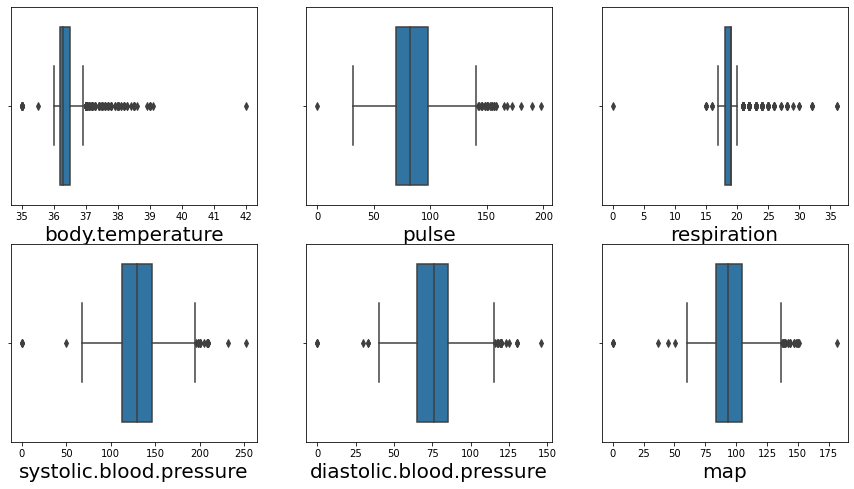

In [27]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot o
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(num_col1.columns, ax.flatten()):
    z = sns.boxplot(x = num_col1[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  


In [28]:
# z = sns.boxplot(x = num_col1[], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot


In [29]:
for i in num_col1.columns:
    q1=num_col1[i].quantile(0.25)
    q3=num_col1[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=num_col1[i].quantile(0.99)
    lc=num_col1[i].quantile(0.01)
    for ind1 in num_col1[i].index:
        if num_col1.loc[ind1, i] >ub:            
            num_col1.loc[ind1, i] =uc
        if num_col1.loc[ind1, i] < lb:
            num_col1.loc[ind1, i] =lc


E:\anoconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


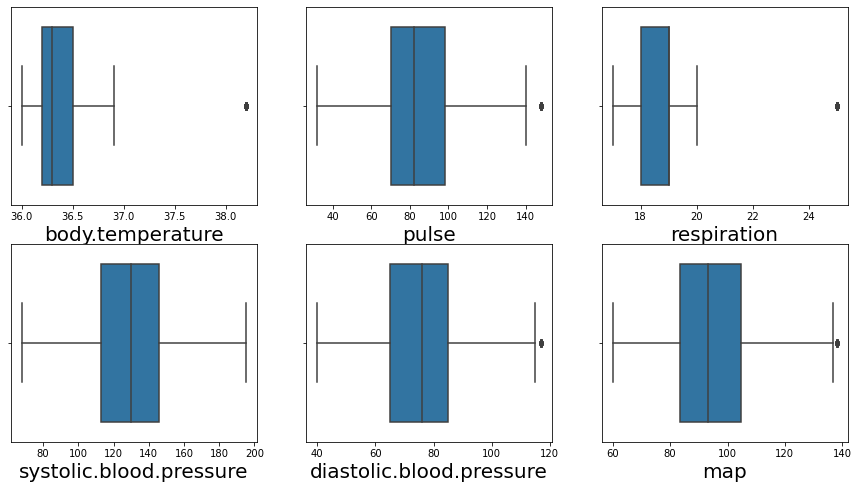

In [30]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot o
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(num_col1.columns, ax.flatten()):
    z = sns.boxplot(x = num_col1[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  


In [31]:
null_count=df.isna().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
null_df=pd.concat([null_count,percentage],axis=1,keys=["null_count","percentage"])
null_df


,null_count,percentage
tricuspid.valve.return.velocity,1214,60.609086
high.sensitivity.protein,1066,53.220170
mitral.valve.EMS,1027,51.273090
total.hemoglobin,1012,50.524214
oxyhemoglobin,1012,50.524214
carboxyhemoglobin,1012,50.524214
methemoglobin,1012,50.524214
hematocrit.blood.gas,1012,50.524214
reduced.hemoglobin,1012,50.524214
standard.bicarbonate,1011,50.474289


In [32]:
#drop body temperature blood gas, it is always 37
df.drop(['body.temperature.blood.gas'],axis=1,inplace=True)

In [33]:
# df2 =pd.read_csv(r'C:\Users\Vinayak\minor_proj\collabRV\EDA\drug_dict_onehot.csv',index_col=[0])
# df3= pd.read_csv(r"D:\git_minor\collabRV\Raw Sets\dat_md- Cardiac Dataset.csv",index_col=[1])

In [34]:
# df2.tail(10)

In [35]:
# df3.head(10)

In [36]:
# df3.shape

In [37]:
df['gender'].replace('Female',0,inplace=True)
df['gender'].replace('Male',1,inplace=True)

df['type.of.heart.failure'].replace('Left',0,inplace=True)
df['type.of.heart.failure'].replace('Right',1,inplace=True)
df['type.of.heart.failure'].replace('Both',2,inplace=True)

df['NYHA.cardiac.function.classification'].replace('III',3,inplace=True)
df['NYHA.cardiac.function.classification'].replace('II',2,inplace=True)
df['NYHA.cardiac.function.classification'].replace('IV',4,inplace=True)

df['Killip.grade'].replace('I',1,inplace=True)
df['Killip.grade'].replace('II',2,inplace=True)
df['Killip.grade'].replace('III',3,inplace=True)
df['Killip.grade'].replace('IV',4,inplace=True)

df['type.II.respiratory.failure'].replace('NonTypeII',0,inplace=True)
df['type.II.respiratory.failure'].replace('TypeII',1,inplace=True)

df['consciousness'].replace('Clear',1,inplace=True)
df['consciousness'].replace('ResponsiveToPain',2,inplace=True)
df['consciousness'].replace('ResponsiveToSound',3,inplace=True)
df['consciousness'].replace('Nonresponsive',4,inplace=True)

df['oxygen.inhalation'].replace('OxygenTherapy',0,inplace=True)
df['oxygen.inhalation'].replace('AmbientAir',1,inplace=True)

df['ageCat'].replace('(21,29]',25,inplace=True)
df['ageCat'].replace('(29,39]',35,inplace=True)
df['ageCat'].replace('(39,49]',45,inplace=True)
df['ageCat'].replace('(49,59]',55,inplace=True)
df['ageCat'].replace('(59,69]',65,inplace=True)
df['ageCat'].replace('(69,79]',75,inplace=True)
df['ageCat'].replace('(79,89]',85,inplace=True)
df['ageCat'].replace('(89,110]',100,inplace=True)

df["respiratory.support."]=df["respiratory.support."].replace("None",0)
df["respiratory.support."]=df["respiratory.support."].replace("IMV",1)
df["respiratory.support."]=df["respiratory.support."].replace("NIMV",2)



In [38]:
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,tricuspid.valve.return.velocity,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,1,36.7,87,19,102,64,76.666667,18.590125,2,3,3,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,0,1,4,5,6,0,0,33,0,NaN,NaN,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,21.6,2.28,5.59,101.9,134.6,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,83.0,65.0,11.4,61.0,23.8,6.9,18.3,4.9,61.9,3.46,1.90,2.69,0.84,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,97.0,93.0,95.9,17.8,1.14,125.0,15,75
743087,0,36.8,95,18,150,70,96.666667,19.195303,2,3,1,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,1,4,5,6,0,0,33,0,40.0,1.16,3.34,62.0,4.29,170.0,85.43,1.25,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,26.5,2.28,3.62,105.6,144.0,0.16,0.84,170.0,21.0,107.0,17.2,203.0,361.70,NaN,2.2,21.9,40.7,1.6,17.0,19.0,13.1,69.0,25.4,5.2,18.3,2.4,66.1,3.15,1.26,0.84,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,75
866418,1,36.5,98,18,102,67,78.666667,24.221453,2,2,2,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,1,4,5,6,0,0,33,0,46.0,0.84,2.80,185.1,15.99,567.0,31.51,2.43,13.01,0.051,0.67,4.43,12.9,44.5,96.4,0

In [39]:
df.shape

(2003, 130)

In [40]:
null_count=df.isna().sum().sort_values(ascending=False)
percentage=((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
null_df=pd.concat([null_count,percentage],axis=1,keys=["null_count","percentage"])
null_df

,null_count,percentage
tricuspid.valve.return.velocity,1214,60.609086
high.sensitivity.protein,1066,53.220170
mitral.valve.EMS,1027,51.273090
reduced.hemoglobin,1012,50.524214
total.hemoglobin,1012,50.524214
oxyhemoglobin,1012,50.524214
carboxyhemoglobin,1012,50.524214
methemoglobin,1012,50.524214
hematocrit.blood.gas,1012,50.524214
chloride.ion,1011,50.474289


In [41]:
null_df.to_csv("NAN.csv")

In [42]:
import random
df.drop(['tricuspid.valve.return.velocity'],axis=1,inplace=True)
df.drop(['prothrombin.time.ratio'],axis=1,inplace=True)


In [ ]:
df.to_csv("only_Na")

In [43]:
df['high.sensitivity.protein'] = df['high.sensitivity.protein'].fillna(random.uniform(0.5,4.5))

In [44]:
df['mitral.valve.EMS'] = df['mitral.valve.EMS'].fillna(random.uniform(0.65,0.75))
df['reduced.hemoglobin'] = df['reduced.hemoglobin'].fillna(random.uniform(0.5,4.5))
df['total.hemoglobin'] = df['total.hemoglobin'].fillna(random.uniform(135,170))
df['oxyhemoglobin'] = df['oxyhemoglobin'].fillna(random.uniform(94.5,96.5))
df['carboxyhemoglobin'] = df['carboxyhemoglobin'].fillna(random.uniform(0.1,1.5))
df['methemoglobin'] = df['methemoglobin'].fillna(random.uniform(0.5,5.5))
df['hematocrit.blood.gas'] = df['hematocrit.blood.gas'].fillna(random.uniform(0.,0.5))
df['chloride.ion'] = df['chloride.ion'].fillna(random.uniform(100,109))
df['pH'] = df['pH'].fillna(random.uniform(7.36,7.44))
df['standard.bicarbonate'] = df['standard.bicarbonate'].fillna(random.uniform(22,26.5))
df['partial.pressure.of.carbon.dioxide'] = df['partial.pressure.of.carbon.dioxide'].fillna(random.uniform(36,44))
df['total.carbon.dioxide'] = df['total.carbon.dioxide'].fillna(random.uniform(25,31))
df['potassium.ion'] = df['potassium.ion'].fillna(random.uniform(3.6,4.4))
df['standard.residual.base'] = df['standard.residual.base'].fillna(random.uniform(-2.8,2.8))
df['sodium.ion'] = df['sodium.ion'].fillna(random.uniform(136,146))
df['free.calcium'] = df['free.calcium'].fillna(random.uniform(1.16,1.28))
df['glucose.blood.gas'] = df['glucose.blood.gas'].fillna(random.uniform(4,6))
df['lactate'] = df['lactate'].fillna(random.uniform(0.6,2.1))
df['measured.residual.base'] = df['measured.residual.base'].fillna(random.uniform(-2.8,2.8))
df['measured.bicarbonate'] = df['measured.bicarbonate'].fillna(random.uniform(23,29))
df['oxygen.saturation'] = df['oxygen.saturation'].fillna(random.uniform(93.5,97.5))
df['partial.oxygen.pressure'] = df['partial.oxygen.pressure'].fillna(random.uniform(83,108))
df['anion.gap'] = df['anion.gap'].fillna(random.uniform(12,16))
df['left.ventricular.end.diastolic.diameter.LV'] = df['left.ventricular.end.diastolic.diameter.LV'].fillna(random.uniform(3.5,5.6))
df['fucosidase'] = df['fucosidase'].fillna(random.uniform(0,40))
df['nucleotidase'] = df['nucleotidase'].fillna(random.uniform(0,10))
df['total.bile.acid'] = df['total.bile.acid'].fillna(random.uniform(0,20))
df['glutamic.oxaloacetic.transaminase'] = df['glutamic.oxaloacetic.transaminase'].fillna(random.uniform(15,40))
df['hydroxybutyrate.dehydrogenase'] = df['hydroxybutyrate.dehydrogenase'].fillna(random.uniform(90,180))
df['creatine.kinase.isoenzyme.to.creatine.kinase'] = df['creatine.kinase.isoenzyme.to.creatine.kinase'].fillna(random.uniform(0,0.05))
df['creatine.kinase'] = df['creatine.kinase'].fillna(random.uniform(22,270))
df['hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase'] = df['hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase'].fillna(random.uniform(0.2,0.8))
df['lactate.dehydrogenase'] = df['lactate.dehydrogenase'].fillna(random.uniform(90,282))
df['creatine.kinase.isoenzyme'] = df['creatine.kinase.isoenzyme'].fillna(random.uniform(0,32))
df['cholesterol'] = df['cholesterol'].fillna(random.uniform(2.9,5.68))
df['low.density.lipoprotein.cholesterol'] = df['low.density.lipoprotein.cholesterol'].fillna(random.uniform(0,3.36))
df['triglyceride'] = df['triglyceride'].fillna(random.uniform(0.2,2.26))
df['high.density.lipoprotein.cholesterol'] = df['high.density.lipoprotein.cholesterol'].fillna(random.uniform(0.9,2.19))
df['D.dimer'] = df['D.dimer'].fillna(random.uniform(0,0.55))
df['platelet.distribution.width'] = df['platelet.distribution.width'].fillna(random.uniform(9,17))
df['mean.platelet.volume'] = df['mean.platelet.volume'].fillna(random.uniform(6.5,12))
df['platelet.hematocrit'] = df['platelet.hematocrit'].fillna(random.uniform(0.108,0.282))
df['glutamyltranspeptidase'] = df['glutamyltranspeptidase'].fillna(random.uniform(10,60))
df['albumin'] = df['albumin'].fillna(random.uniform(40,55))
df['indirect.bilirubin'] = df['indirect.bilirubin'].fillna(random.uniform(0,16))
df['white.globulin.ratio'] = df['white.globulin.ratio'].fillna(random.uniform(1.2,2.4))
df['glutamic.pyruvic.transaminase'] = df['glutamic.pyruvic.transaminase'].fillna(random.uniform(9,50))
df['total.protein'] = df['total.protein'].fillna(random.uniform(65,85))
df['total.bilirubin'] = df['total.bilirubin'].fillna(random.uniform(2,20.4))
df['direct.bilirubin'] = df['direct.bilirubin'].fillna(random.uniform(0,6.8))
df['globulin'] = df['globulin'].fillna(random.uniform(20,40))
df['alkaline.phosphatase'] = df['alkaline.phosphatase'].fillna(random.uniform(45,125))
df['high.sensitivity.troponin'] = df['high.sensitivity.troponin'].fillna(random.uniform(0,14))
df['glomerular.filtration.rate'] = df['glomerular.filtration.rate'].fillna(random.uniform(90,120))
df['prothrombin.activity'] = df['prothrombin.activity'].fillna(random.uniform(70,120))
df['cystatin'] = df['cystatin'].fillna(random.uniform(0.51,0.98))
df['brain.natriuretic.peptide'] = df['brain.natriuretic.peptide'].fillna(random.uniform(0,100))
# df['prothrombin.time.ratio'] = df['prothrombin.time.ratio'].fillna(random.uniform())
df['international.normalized.ratio'] = df['international.normalized.ratio'].fillna(random.uniform(0.8,1.5))
df['thrombin.time'] = df['thrombin.time'].fillna(random.uniform(14,21))
df['fibrinogen'] = df['fibrinogen'].fillna(random.uniform(2,4))
df['activated.partial.thromboplastin.time'] = df['activated.partial.thromboplastin.time'].fillna(random.uniform(20,40))
df['standard.deviation.of.red.blood.cell.distribution.width'] = df['standard.deviation.of.red.blood.cell.distribution.width'].fillna(random.uniform(40,53))
df['coefficient.of.variation.of.red.blood.cell.distribution.width'] = df['coefficient.of.variation.of.red.blood.cell.distribution.width'].fillna(random.uniform(0,15))
df['mean.hemoglobin.volume'] = df['mean.hemoglobin.volume'].fillna(random.uniform(27,35))
df['hemoglobin'] = df['hemoglobin'].fillna(random.uniform(110,160))
df['hematocrit'] = df['hematocrit'].fillna(random.uniform(35,50))
df['mean.corpuscular.volume'] = df['mean.corpuscular.volume'].fillna(random.uniform(82,96))
df['neutrophil.ratio'] = df['neutrophil.ratio'].fillna(random.uniform(0.5,0.7))
df['neutrophil.count'] = df['neutrophil.count'].fillna(random.uniform(2,7))
df['basophil.count'] = df['basophil.count'].fillna(random.uniform(0,0.1))
df['white.blood.cell'] = df['white.blood.cell'].fillna(random.uniform(4,10))
df['monocyte.count'] = df['monocyte.count'].fillna(random.uniform(0.2,0.8))
df['red.blood.cell'] = df['red.blood.cell'].fillna(random.uniform(3.5,5.5))
df['lymphocyte.count'] = df['lymphocyte.count'].fillna(random.uniform(0.8,4))
df['mean.hemoglobin.concentration'] = df['mean.hemoglobin.concentration'].fillna(random.uniform(320,360))
df['platelet'] = df['platelet'].fillna(random.uniform(100,300))
df['basophil.ratio'] = df['basophil.ratio'].fillna(random.uniform(0,1))
df['eosinophil.ratio'] = df['eosinophil.ratio'].fillna(random.uniform(0.5,5))
df['monocyte.ratio'] = df['monocyte.ratio'].fillna(random.uniform(3,11.4))
df['uric.acid'] = df['uric.acid'].fillna(random.uniform(150,440))
df['urea'] = df['urea'].fillna(random.uniform(1.7,8.3))
df['creatinine.enzymatic.method'] = df['creatinine.enzymatic.method'].fillna(random.uniform(44,110))
df['sodium'] = df['sodium'].fillna(random.uniform(137,147))
df['chloride'] = df['chloride'].fillna(random.uniform(99,110))
df['potassium'] = df['potassium'].fillna(random.uniform(3.5,4.5))
df['calcium'] = df['calcium'].fillna(random.uniform(2.11,2.52))
df['carbon.dioxide.binding.capacity'] = df['carbon.dioxide.binding.capacity'].fillna(random.uniform(22,30))

In [45]:
df['eosinophil.count'] = df['eosinophil.count'].fillna(random.uniform(0.02,0.5))


In [46]:
null_count=df.isna().sum().sort_values(ascending=False)
percentage=((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
null_df=pd.concat([null_count,percentage],axis=1,keys=["null_count","percentage"])
null_df

,null_count,percentage
gender,0,0.0
body.temperature,0,0.0
alkaline.phosphatase,0,0.0
indirect.bilirubin,0,0.0
glutamic.pyruvic.transaminase,0,0.0
glutamyltranspeptidase,0,0.0
white.globulin.ratio,0,0.0
albumin,0,0.0
fucosidase,0,0.0
nucleotidase,0,0.0


In [57]:
#df2 =pd.read_csv(r'C:\Users\Vinayak\minor_proj\collabRV\EDA\drug_dict_onehot.csv',index_col=[0])
df1= pd.read_csv(r"D:\git_minor\collabRV\Raw Sets\dat_md- Cardiac Dataset.csv",index_col=[0])

In [58]:
# df1.drop(["Unnamed: 0"],axis=1,inplace=True)
# df1.head()

In [59]:
df1["Drug_name"].count()

12654

In [60]:
df1["Drug_name"].unique()

array(['sulfotanshinone sodium injection', 'Furosemide tablet',
       'Meglumine Adenosine Cyclophosphate for injection',
       'Furosemide injection', 'Milrinone injection',
       'Deslanoside injection', 'Torasemide tablet',
       'Benazepril hydrochloride tablet', 'Atorvastatin calcium tablet',
       'Digoxin tablet', 'Hydrochlorothiazide tablet',
       'Spironolactone tablet', 'Valsartan Dispersible tablet',
       'Dobutamine hydrochloride injection',
       'Isoprenaline Hydrochloride injection', 'Nitroglycerin injection',
       'Shenfu injection',
       'Isosorbide Mononitrate Sustained Release tablet'], dtype=object)

In [61]:
df1["Drug_name"].value_counts()

Spironolactone tablet                               1833
Furosemide injection                                1718
Furosemide tablet                                   1641
Meglumine Adenosine Cyclophosphate for injection    1114
Deslanoside injection                               1015
Digoxin tablet                                       998
Atorvastatin calcium tablet                          822
Milrinone injection                                  707
sulfotanshinone sodium injection                     570
Benazepril hydrochloride tablet                      434
Valsartan Dispersible tablet                         348
Shenfu injection                                     338
Isosorbide Mononitrate Sustained Release tablet      326
Hydrochlorothiazide tablet                           283
Torasemide tablet                                    252
Nitroglycerin injection                              203
Isoprenaline Hydrochloride injection                  30
Dobutamine hydrochloride inject

In [62]:
df3 = pd.get_dummies(df1.Drug_name)
merged = pd.concat([df1,df3],axis=1)
merged.head(9)

,inpatient.number,Drug_name,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
1,857781,sulfotanshinone sodium injection,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,857781,Furosemide tablet,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,857781,Meglumine Adenosine Cyclophosphate for injection,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,857781,Furosemide injection,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,857781,Milrinone injection,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,857781,Deslanoside injection,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,857781,Torasemide tablet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,857781,Benazepril hydrochloride tablet,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,857781,Atorvastatin calcium tablet,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
merged = merged.drop(['Drug_name'],axis=1)
merged.head()

,inpatient.number,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
1,857781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,857781,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,857781,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,857781,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,857781,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [64]:
aggregation_function ={'inpatient.number':'first','sulfotanshinone sodium injection' :'sum','Furosemide tablet':'sum',
'Meglumine Adenosine Cyclophosphate for injection':'sum',
 'Furosemide injection':'sum',
 'Milrinone injection':'sum',
 'Deslanoside injection':'sum',
 'Torasemide tablet':'sum',
 'Benazepril hydrochloride tablet':'sum',
 'Atorvastatin calcium tablet':'sum',
 'Digoxin tablet':'sum',
 'Hydrochlorothiazide tablet':'sum',
 'Spironolactone tablet':'sum',
 'Valsartan Dispersible tablet':'sum',
 'Dobutamine hydrochloride injection':'sum',
 'Isoprenaline Hydrochloride injection':'sum',
 'Nitroglycerin injection':'sum',
 'Shenfu injection':'sum',
 'Isosorbide Mononitrate Sustained Release tablet':'sum'}
df_new = merged.groupby(merged['inpatient.number']).aggregate(aggregation_function)
#df_new = df_new.iloc[: , 1:]
df_new.head()





,inpatient.number,sulfotanshinone sodium injection,Furosemide tablet,Meglumine Adenosine Cyclophosphate for injection,Furosemide injection,Milrinone injection,Deslanoside injection,Torasemide tablet,Benazepril hydrochloride tablet,Atorvastatin calcium tablet,Digoxin tablet,Hydrochlorothiazide tablet,Spironolactone tablet,Valsartan Dispersible tablet,Dobutamine hydrochloride injection,Isoprenaline Hydrochloride injection,Nitroglycerin injection,Shenfu injection,Isosorbide Mononitrate Sustained Release tablet
inpatient.number,,,,,,,,,,,,,,,,,,,
722128,722128,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
723327,723327,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1
723617,723617,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
724385,724385,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
725509,725509,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0


In [65]:
df_new.reset_index(drop = True, inplace = True)
df_new = df_new.sort_values('inpatient.number',ascending=True)
df_new.head()

,inpatient.number,sulfotanshinone sodium injection,Furosemide tablet,Meglumine Adenosine Cyclophosphate for injection,Furosemide injection,Milrinone injection,Deslanoside injection,Torasemide tablet,Benazepril hydrochloride tablet,Atorvastatin calcium tablet,Digoxin tablet,Hydrochlorothiazide tablet,Spironolactone tablet,Valsartan Dispersible tablet,Dobutamine hydrochloride injection,Isoprenaline Hydrochloride injection,Nitroglycerin injection,Shenfu injection,Isosorbide Mononitrate Sustained Release tablet
0,722128,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
1,723327,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1
2,723617,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,724385,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
4,725509,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0


In [69]:
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,fibrinogen,high.sensitivity.troponin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,1,36.7,87,19,102,64,76.666667,18.590125,2,3,3,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,0,1,4,5,6,0,0,33,0,4.924371,0.727953,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,3.84,0.094,21.6,2.28,5.59,101.9,134.6,0.220000,0.630000,185.000000,81.000000,43.000000,9.600000,294.000000,1500.17,7.600000,3.5,20.5,38.1,1.6,83.0,65.0,11.4,61.0,23.8,6.9,18.3,4.9,61.9,3.46,1.90,2.69,0.84,7.440000,-3.000000,22.700000,32.000000,22.200000,0.300000,37.000000,3.400000,5.630000,103.000000,136.400000,5.800000,2.500000,-2.100000,21.200000,0.400000,97.000000,93.000000,95.900000,17.800000,1.140000,125.000000,15,75
743087,0,36.8,95,18,150,70,96.666667,19.195303,2,3,1,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,1,4,5,6,0,0,33,0,40.000000,1.160000,62.0,4.29,170.0,85.43,1.25,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73,1.06,1.16,35.9,18.4,65.1,2.62,0.017,26.5,2.28,3.62,105.6,144.0,0.160000,0.840000,170.000000,21.000000,107.000000,17.200000,203.000000,361.70,2.046148,2.2,21.9,40.7,1.6,17.0,19.0,13.1,69.0,25.4,5.2,18.3,2.4,66.1,3.15,1.26,0.84,1.30,7.364001,-2.192435,26.299825,41.323308,30.668119,5.012705,0.270574,0.685739,4.205551,108.587348,141.350467,4.705488,1.616595,0.625243,28.907347,0.836194,94.455872,1

In [70]:
df.sort_index(inplace=True)

In [71]:
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,fibrinogen,high.sensitivity.troponin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
722128,0,36.9,66,18,121,56,77.666667,18.590125,2,4,1,0,1,0,0,0,0,0,1.0,0,1.0,0,0,0,0,0.0,0,3.0,0,1,4,5,6,0,0,33,0,45.000000,0.727953,148.0,13.84,464.0,90.903529,2.72,4.05,0.133,0.54,2.43,19.0,53.7,77.8,0.189,0.41,22.2,286.0,11.594557,0.002,0.01,0.022,0.09,54.0,120.0,16.271853,0.265538,0.742,3.00,0.740000,1.43,28.7,15.3,48.70,2.72,0.031,24.2,2.13,4.42,99.1,138.0,0.230000,0.950000,591.000000,36.000000,76.000000,17.200000,621.000000,162.43,2.046148,3.678882,26.630417,37.7,1.3,29.0,10.0,7.4,74.0,28.2,5.2,12.6,6.226962,65.9,2.84,1.03,0.54,1.34,7.364001,-2.192435,26.299825,41.323308,30.668119,5.012705,0.270574,0.685739,4.205551,108.587348,141.350467,4.705488,1.616595,0.625243,28.907347,0.836194,94.455872,105.719735,94.561237,12.730301,1.200678,160.825022,15,75
723327,0,36.0,72,21,150,80,103.333333,21.644121,2,4,1,0,1,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,1.0,0,1,4,5,6,0,1,21,0,4.924371,0.727953,141.4,14.09,506.0,90.903529,3.00,4.28,0.241,1.03,2.58,19.4,72.0,104.3,0.269,1.01,33.7,323.0,11.594557,0.002,0.01,0.005,0.02,87.0,67.0,16.271853,0.265538,0.516,2.21,0.326452,1.23,36.5,14.0,63.80,3.54,0.016,25.4,2.08,4.40,107.3,144.0,0.026181,0.221987,97.451224,37.364137,108.769773,28.455941,241.055475,1511.61,0.700000,3.678882,26.630417,36.0,1.9,38.0,5.0,6.5,55.0,19.4,6.1,12.6,6.226962,55.4,2.52,0.90,0.63,1.01,7.350000,-3.800000,21.400000,41.000000,23.100000,0.300000,21.000000,9.000000,3.820000,109.0000

In [78]:
df_new.set_index(['inpatient.number'],inplace=True)

In [79]:
df_new.sort_index(inplace=True)
df_new.head()

,sulfotanshinone sodium injection,Furosemide tablet,Meglumine Adenosine Cyclophosphate for injection,Furosemide injection,Milrinone injection,Deslanoside injection,Torasemide tablet,Benazepril hydrochloride tablet,Atorvastatin calcium tablet,Digoxin tablet,Hydrochlorothiazide tablet,Spironolactone tablet,Valsartan Dispersible tablet,Dobutamine hydrochloride injection,Isoprenaline Hydrochloride injection,Nitroglycerin injection,Shenfu injection,Isosorbide Mononitrate Sustained Release tablet
inpatient.number,,,,,,,,,,,,,,,,,,
722128,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
723327,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1
723617,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
724385,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
725509,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0


In [82]:
df.reset_index(level=0,inplace=True)
df_new.reset_index(level=0,inplace=True)

In [90]:
len(df)

2003

In [93]:
df3 = pd.merge(df, df_new, how='outer', suffixes=('','_y'), indicator=True)
rows_in_df_not_in_df_new = df3[df3['_merge']=='left_only'][df.columns]
rows_in_df_not_in_df_new.head()

,inpatient.number,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,fibrinogen,high.sensitivity.troponin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
827,789308,1.0,36.5,102.0,24.0,174.0,100.0,124.666667,20.202020,0.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,5.0,6.0,0.0,0.0,33.0,0.0,46.000000,0.870000,86.4,4.40,439.0,75.89,1.37,6.940000,0.091000,0.630000,6.620000,17.100000,45.800000,75.100000,0.497000,0.590000,23.500000,312.000000,9.300000,0.004000,0.030000,0.04000,0.280000,155.000000,139.000000,15.300000,0.129000,0.779000,5.410000,0.326452,1.06,31.4,16.3,90.4,3.38,0.046,36.5,2.38,3.90,95.1,139.5,0.17,0.79,156.0,35.0,126.0,21.0,198.0,113.76,18.200000,2.400000,26.300000,42.0,1.4,25.0,44.0,8.5,76.0,31.1,3.9,12.4,6.700000,73.1,4.260000,1.840000,0.700000,1.790000,7.360000,9.600000,30.500000,64.000000,37.100000,0.200000,48.000000,13.800000,3.960000,97.000000,139.900000,8.800000,1.500000,7.000000,35.100000,2.300000,86.000000,51.000000,83.700000,11.800000,1.140000,163.000000,15.0,75.0
955,796480,1.0,36.3,95.0,19.0,150.0,76.0,100.666667,22.038567,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,5.0,6.0,0.0,0.0,33.0,0.0,38.000000,0.610000,95.6,7.28,605.0,69.06,0.99,10.730000,0.060000,0.640000,7.020000,15.000000,39.100000,72.400000,0.508000,1.220000,23.100000,319.000000,11.400000,0.005000,0.050000,0.01500,0.160000,162.000000,137.000000,15.700000,0.157000,0.806000,8.660000,6.690000,1.03,33.3,15.2,94.4,2.59,0.052,26.7,2.46,3.74,102.1,143.7,0.12,0.77,199.0,26.0,110.0,13.5,257.0,350.96,31.800000,5.800000,17.300000,41.9,1.3,126.0,50.0,19.9,99.0,32.7,7.1,27.0,21.200000,74.6,3.563483

In [94]:
 b=[863648,796480, 789308 ,829624]
 print(b)

[863648, 796480, 789308, 829624]


In [96]:
for i in b:
    a={'inpatient.number':i,
    'Atorvastatin calcium tablet':0,
    'Benazepril hydrochloride tablet':0,
    'Deslanoside injection':0,
    'Digoxin tablet':0,
    'Dobutamine hydrochloride injection':0,
    'Furosemide injection':0,
    'Furosemide tablet':0,
    'Hydrochlorothiazide tablet':0,
    'Isoprenaline Hydrochloride injection':0,
    'Isosorbide Mononitrate Sustained Release tablet':0,
    'Meglumine Adenosine Cyclophosphate for injection':0,
    'Milrinone injection':0,
    'Nitroglycerin injection':0,
    'Shenfu injection':0,
    'Spironolactone tablet':0,
    'Torasemide tablet':0,
    'Valsartan Dispersible tablet':0,
    'sulfotanshinone sodium injection':0}
    df_new = df_new.append(a, ignore_index=True)


In [97]:
df_new.shape

(2008, 19)

In [98]:
df3 = pd.merge(df_new, df, how='outer', suffixes=('','_y'), indicator=True)
rows_in_df_new_not_in_df_ = df3[df3['_merge']=='left_only'][df_new.columns]
rows_in_df_new_not_in_df_.head()

,inpatient.number,sulfotanshinone sodium injection,Furosemide tablet,Meglumine Adenosine Cyclophosphate for injection,Furosemide injection,Milrinone injection,Deslanoside injection,Torasemide tablet,Benazepril hydrochloride tablet,Atorvastatin calcium tablet,Digoxin tablet,Hydrochlorothiazide tablet,Spironolactone tablet,Valsartan Dispersible tablet,Dobutamine hydrochloride injection,Isoprenaline Hydrochloride injection,Nitroglycerin injection,Shenfu injection,Isosorbide Mononitrate Sustained Release tablet
726,782088,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
873,791916,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
899,793609,0,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,0
917,794590,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1352,818307,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [99]:
 a=[782088,791916,793609,794590,818307]
 for i in a:
      df_new.drop(df_new[df_new['inpatient.number'] ==i ].index, inplace = True)


In [101]:
df_new.set_index(['inpatient.number'],inplace=True)
df_new.sort_index(inplace=True)
df_new.head()

,sulfotanshinone sodium injection,Furosemide tablet,Meglumine Adenosine Cyclophosphate for injection,Furosemide injection,Milrinone injection,Deslanoside injection,Torasemide tablet,Benazepril hydrochloride tablet,Atorvastatin calcium tablet,Digoxin tablet,Hydrochlorothiazide tablet,Spironolactone tablet,Valsartan Dispersible tablet,Dobutamine hydrochloride injection,Isoprenaline Hydrochloride injection,Nitroglycerin injection,Shenfu injection,Isosorbide Mononitrate Sustained Release tablet
inpatient.number,,,,,,,,,,,,,,,,,,
722128,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
723327,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1
723617,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
724385,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
725509,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0


In [102]:
df.set_index(['inpatient.number'],inplace=True)
df.sort_index(inplace=True)
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,fibrinogen,high.sensitivity.troponin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
722128,0,36.9,66,18,121,56,77.666667,18.590125,2,4,1,0,1,0,0,0,0,0,1.0,0,1.0,0,0,0,0,0.0,0,3.0,0,1,4,5,6,0,0,33,0,45.000000,0.727953,148.0,13.84,464.0,90.903529,2.72,4.05,0.133,0.54,2.43,19.0,53.7,77.8,0.189,0.41,22.2,286.0,11.594557,0.002,0.01,0.022,0.09,54.0,120.0,16.271853,0.265538,0.742,3.00,0.740000,1.43,28.7,15.3,48.70,2.72,0.031,24.2,2.13,4.42,99.1,138.0,0.230000,0.950000,591.000000,36.000000,76.000000,17.200000,621.000000,162.43,2.046148,3.678882,26.630417,37.7,1.3,29.0,10.0,7.4,74.0,28.2,5.2,12.6,6.226962,65.9,2.84,1.03,0.54,1.34,7.364001,-2.192435,26.299825,41.323308,30.668119,5.012705,0.270574,0.685739,4.205551,108.587348,141.350467,4.705488,1.616595,0.625243,28.907347,0.836194,94.455872,105.719735,94.561237,12.730301,1.200678,160.825022,15,75
723327,0,36.0,72,21,150,80,103.333333,21.644121,2,4,1,0,1,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,1.0,0,1,4,5,6,0,1,21,0,4.924371,0.727953,141.4,14.09,506.0,90.903529,3.00,4.28,0.241,1.03,2.58,19.4,72.0,104.3,0.269,1.01,33.7,323.0,11.594557,0.002,0.01,0.005,0.02,87.0,67.0,16.271853,0.265538,0.516,2.21,0.326452,1.23,36.5,14.0,63.80,3.54,0.016,25.4,2.08,4.40,107.3,144.0,0.026181,0.221987,97.451224,37.364137,108.769773,28.455941,241.055475,1511.61,0.700000,3.678882,26.630417,36.0,1.9,38.0,5.0,6.5,55.0,19.4,6.1,12.6,6.226962,55.4,2.52,0.90,0.63,1.01,7.350000,-3.800000,21.400000,41.000000,23.100000,0.300000,21.000000,9.000000,3.820000,109.0000

In [106]:
df_new.to_csv("drug_onehot_latest.csv")
df.to_csv("random_imputed.csv")
